<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [35]:
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
print(df.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [36]:
print(df.head())
print(df.tail())
print(df.shape)

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [38]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [39]:
def extract_education(text):
    if pd.isna(text):
        return np.nan
    words = text.split()[:2]
    education = ' '.join(words).lower()
    if 'высшее' in education and 'неоконченное' not in education:
        return 'высшее'
    elif 'неоконченное' in education:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education:
        return 'среднее специальное'
    elif 'среднее' in education:
        return 'среднее'
    return np.nan

df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)
print(df['Образование'].unique())
df = df.drop('Образование и ВУЗ', axis=1)

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [40]:
def extract_gender_age(text):
    if pd.isna(text):
        return np.nan, np.nan
    parts = text.split(' , ')
    gender_text = parts[0].strip()
    age_text = parts[1].strip()
    
    if 'Мужчина' in gender_text:
        gender = 'М'
    elif 'Женщина' in gender_text:
        gender = 'Ж'
    else:
        gender = np.nan
    
    age = int(age_text.split()[0])
    
    return gender, age

df[['Пол', 'Возраст']] = df['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_age(x)))
gender_counts = df['Пол'].value_counts()
print(gender_counts['М'])
print(gender_counts['Ж'])
df = df.drop('Пол, возраст', axis=1)

36211
8533


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [41]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

def exp_to_months(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s == 'Не указано':
        return np.nan

    head = s.split('\n', 1)[0]
    head = re.sub(r'^\s*Опыт работы[:\s]*', '', head, flags=re.IGNORECASE)

    y_match = re.search(r'(\d+)\s*(?:год|года|лет|г\.)\b', head, flags=re.IGNORECASE)
    m_match = re.search(r'(\d+)\s*(?:месяц|месяца|месяцев|мес\.)\b', head, flags=re.IGNORECASE)

    years = int(y_match.group(1)) if y_match else 0
    months = int(m_match.group(1)) if m_match else 0

    if not y_match and not m_match:
        return np.nan

    return years * 12 + months

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(exp_to_months)
df = df.drop(columns=['Опыт работы'])

median_exp_months = int(df['Опыт работы (месяц)'].dropna().median())
print(median_exp_months)


100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [42]:
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def extract_city_relocation(text):
    if pd.isna(text):
        return np.nan, False, False
    
    parts = [p.strip() for p in text.split(',')]
    
    city = parts[0]
    if 'м.' in city:
        city = city.split('м.')[0].strip()
    
    if city == 'Москва':
        city_category = 'Москва'
    elif city == 'Санкт-Петербург':
        city_category = 'Санкт-Петербург'
    elif city in million_cities:
        city_category = 'город-миллионник'
    else:
        city_category = 'другие'
    
    relocation_text = ' '.join(parts[1:])
    relocation = False
    if any(phrase in relocation_text for phrase in ['готов к переезду', 'готова к переезду', 'хочу переехать']):
        relocation = True
    
    business_trips = False
    if any(phrase in relocation_text for phrase in ['готов к командировкам', 'готова к командировкам', 'готов к редким командировкам', 'готова к редким командировкам']):
        business_trips = True
    
    return city_category, relocation, business_trips

df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_relocation(x)))
df['Готовность к командировкам'] = df['Готовность к командировкам'].fillna(False)
relocation_pct = (df['Готовность к переезду'].sum() / len(df)) * 100
business_trips_pct = (df['Готовность к командировкам'].sum() / len(df)) * 100
print(f"{relocation_pct:.2f}")
print(f"{business_trips_pct:.2f}")
df = df.drop('Город, переезд, командировки', axis=1)

100.00
99.83


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [43]:
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for category in employment_categories:
    df[f'Занятость_{category}'] = df['Занятость'].apply(lambda x: category in str(x).lower() if pd.notna(x) else False)

for category in schedule_categories:
    df[f'График_{category}'] = df['График'].apply(lambda x: category in str(x).lower() if pd.notna(x) else False)

print("Занятость:")
for category in employment_categories:
    print(f"{category}: {df[f'Занятость_{category}'].sum()}")
print("\nГрафик:")
for category in schedule_categories:
    print(f"{category}: {df[f'График_{category}'].sum()}")

df = df.drop(['Занятость', 'График'], axis=1)

Занятость:
полная занятость: 43284
частичная занятость: 13136
проектная работа: 8068
волонтерство: 486
стажировка: 2804

График:
полный день: 41716
сменный график: 12725
гибкий график: 15584
удаленная работа: 15022
вахтовый метод: 3084


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [44]:
currency_mapping_table = [
    {'names': ['руб.', 'руб'], 'iso': 'RUB', 'proportion': 1},
    {'names': ['грн.'],        'iso': 'UAH', 'proportion': 10},
    {'names': ['USD'],         'iso': 'USD', 'proportion': 1},
    {'names': ['EUR'],         'iso': 'EUR', 'proportion': 1},
    {'names': ['белруб'],      'iso': 'BYN', 'proportion': 1},
    {'names': ['KGS'],         'iso': 'KGS', 'proportion': 10},
    {'names': ['сум'],         'iso': 'UZS', 'proportion': 10000},
    {'names': ['AZN'],         'iso': 'AZN', 'proportion': 1},
    {'names': ['KZT'],         'iso': 'KZT', 'proportion': 100}
]

currency_lookup = {}
proportion_lookup = {}
for row in currency_mapping_table:
    for n in row['names']:
        currency_lookup[n] = row['iso']
        proportion_lookup[row['iso']] = row['proportion']

def extract_salary_currency_v2(text):
    if pd.isna(text) or not isinstance(text, str):
        return np.nan, np.nan
    st = text.strip()
    for k, iso in currency_lookup.items():
        if k in st:
            try:
                amount_str = st.replace(k, '').replace(' ', '').strip()
                amount = float(amount_str)
                return amount, iso
            except Exception:
                return np.nan, iso
    return np.nan, np.nan

df['Обновление резюме_date'] = pd.to_datetime(df['Обновление резюме']).dt.date
df[['ЗП_сумма', 'ЗП_валюта']] = df['ЗП'].apply(lambda x: pd.Series(extract_salary_currency_v2(x)))

currency_rates_manual = []
currency_rates_manual.append({'currency':'RUB', 'date':None, 'proportion':1, 'close':1})
for iso in ['UAH','USD','EUR','BYN','KGS','UZS','AZN','KZT']:
    currency_rates_manual.append({
        'currency': iso,
        'date': None,
        'proportion': proportion_lookup[iso],
        'close': 1
    })
currency_rates = pd.DataFrame(currency_rates_manual)

df = df.merge(currency_rates[['currency', 'proportion', 'close']], 
              left_on=['ЗП_валюта'], right_on=['currency'], how='left')

df.loc[df['ЗП_валюта'] == 'RUB', 'close'] = 1.0
df.loc[df['ЗП_валюта'] == 'RUB', 'proportion'] = 1.0

df['ЗП (руб)'] = df['ЗП_сумма'] * df['close'] / df['proportion']

print(f"Средняя ЗП в рублях: {df['ЗП (руб)'].mean():.2f}")
print(f"Медианная ЗП в рублях: {df['ЗП (руб)'].median():.2f}")
print(f"Пропусков в ЗП: {df['ЗП (руб)'].isna().sum()}")

df = df.drop(['ЗП', 'ЗП_сумма', 'ЗП_валюта'], axis=1, errors='ignore')
if 'currency' in df.columns:
    df = df.drop('currency', axis=1)
if 'proportion' in df.columns:
    df = df.drop('proportion', axis=1)
if 'close' in df.columns:
    df = df.drop('close', axis=1)
if 'Обновление резюме_date' in df.columns:
    df = df.drop('Обновление резюме_date', axis=1)

/var/folders/bh/sr1hhwmj4l38d3vk92t9492m0000gn/T/ipykernel_75530/1401659551.py:34: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Обновление резюме_date'] = pd.to_datetime(df['Обновление резюме']).dt.date


Средняя ЗП в рублях: 73015.07
Медианная ЗП в рублях: 55000.00
Пропусков в ЗП: 329


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

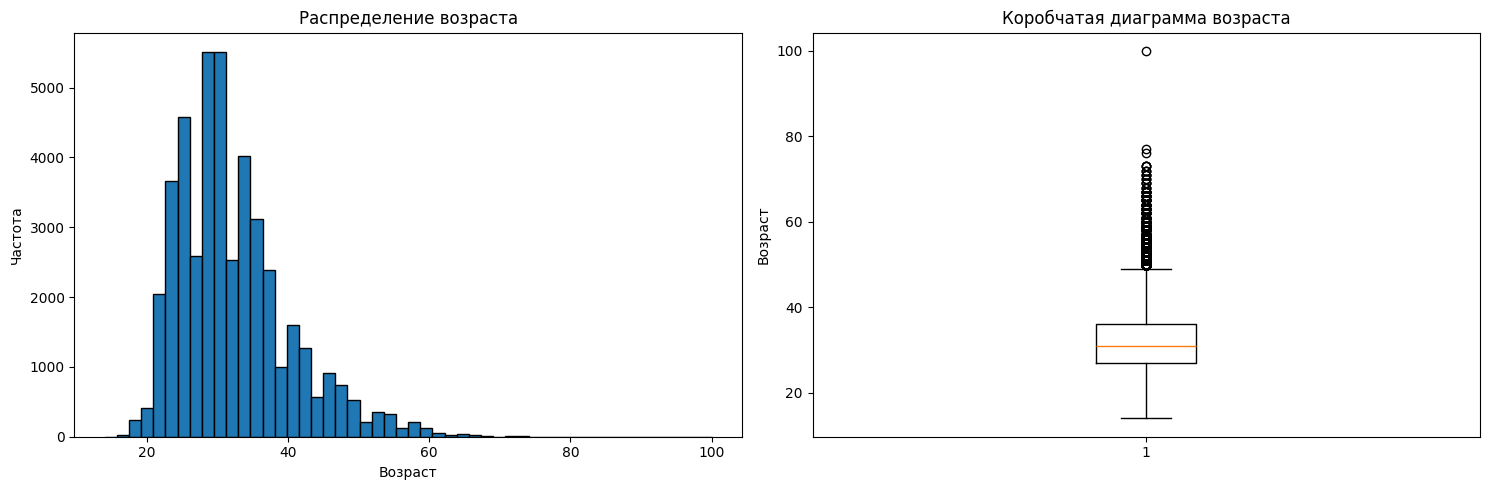

Мода: 30
Минимум: 14
Максимум: 100
Медиана: 31.0


In [45]:
def extract_age_from_field(s):
    if not isinstance(s, str):
        return None
    parts = s.split(',')
    for p in parts:
        p_stripped = p.strip()
        if 'лет' in p_stripped:
            num = p_stripped.split('лет')[0].strip()
            if num.isdigit():
                return int(num)
            else:
                try:
                    return int(''.join([c for c in num if c.isdigit()]))
                except:
                    return None
        elif 'года' in p_stripped:
            num = p_stripped.split('года')[0].strip()
            if num.isdigit():
                return int(num)
            else:
                try:
                    return int(''.join([c for c in num if c.isdigit()]))
                except:
                    return None
        elif 'год' in p_stripped:
            num = p_stripped.split('год')[0].strip()
            if num.isdigit():
                return int(num)
            else:
                try:
                    return int(''.join([c for c in num if c.isdigit()]))
                except:
                    return None
    return None

if 'Возраст' not in df.columns:
    df['Возраст'] = df['Пол, возраст'].apply(extract_age_from_field)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['Возраст'].dropna(), bins=50, edgecolor='black')
axes[0].set_title('Распределение возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

axes[1].boxplot(df['Возраст'].dropna())
axes[1].set_title('Коробчатая диаграмма возраста')
axes[1].set_ylabel('Возраст')

plt.tight_layout()
plt.show()

print(f"Мода: {df['Возраст'].mode().values[0]}")
print(f"Минимум: {df['Возраст'].min()}")
print(f"Максимум: {df['Возраст'].max()}")
print(f"Медиана: {df['Возраст'].median()}")

На гистограмме видно, что распределение возраста соискателей асимметрично и смещено влево: большинство соискателей находятся в возрасте от примерно 25 до 40 лет, пик (мода) - в районе 30 лет. Минимальный возраст - 14 лет, максимальный - 100, однако видно, что значения старше ~60 лет встречаются крайне редко - это единичные аномалии. Также есть аномалии среди минимальных значений: соискатели моложе 18 лет - большая редкость. Медианный возраст - 31 год, то есть половине соискателей меньше 31 года, половине - больше. В целом, распределение соответствует ожиданиям для рынка труда - большая часть кандидатов в трудоспособном возрасте.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

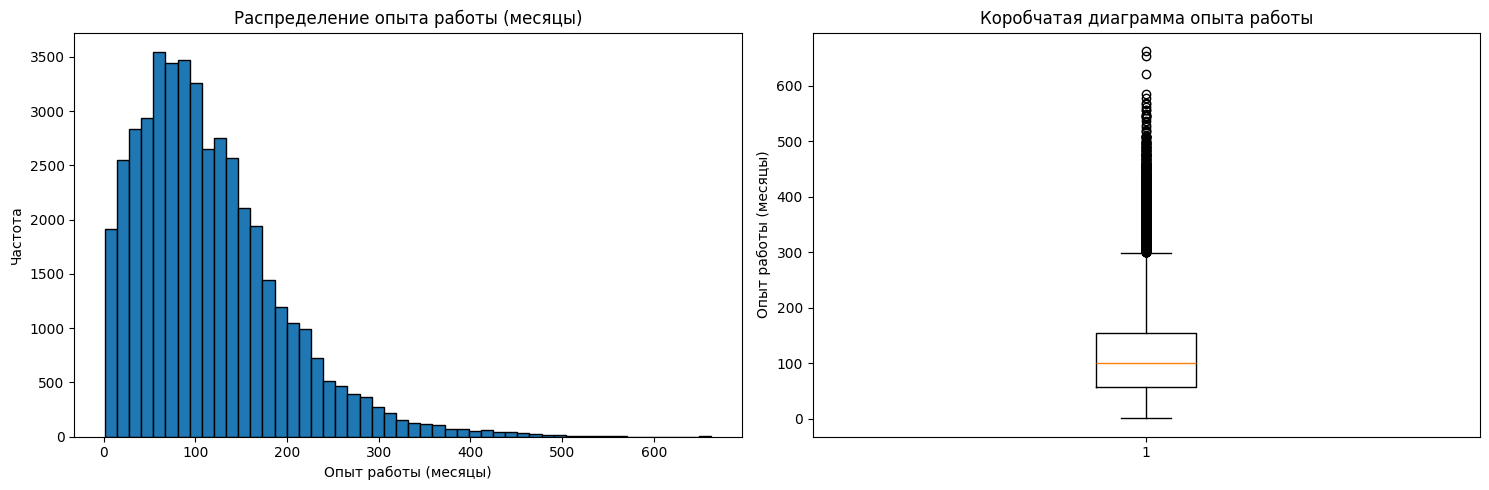

Мода: 81.0
Минимум: 1.0
Максимум: 24230.0
Медиана: 100.0


In [46]:
def extract_experience_months(experience_str):
    import re
    if not isinstance(experience_str, str):
        return None

    match_main = re.search(r'Опыт работы\s*:\s*([^\.,]+)', experience_str)
    main_part = match_main.group(1) if match_main else experience_str
    years = 0
    months = 0
    years_match = re.search(r'(\d+)\s*г(ода|одов|од)?', main_part)
    months_match = re.search(r'(\d+)\s*месяц', main_part)

    if years_match:
        years = int(years_match.group(1))
    if months_match:
        months = int(months_match.group(1))
    total_months = years*12 + months
    if total_months > 300:
        return None
    return total_months

if 'Опыт работы (месяц)' not in df.columns:
    df['Опыт работы (месяц)'] = df['Опыт работы'].apply(extract_experience_months)

exp_to_plot = df['Опыт работы (месяц)'].dropna()
exp_to_plot = exp_to_plot[exp_to_plot <= 1000]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(exp_to_plot, bins=50, edgecolor='black')
axes[0].set_title('Распределение опыта работы (месяцы)')
axes[0].set_xlabel('Опыт работы (месяцы)')
axes[0].set_ylabel('Частота')

axes[1].boxplot(exp_to_plot)
axes[1].set_title('Коробчатая диаграмма опыта работы')
axes[1].set_ylabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

print(f"Мода: {df['Опыт работы (месяц)'].mode().values[0]}")
print(f"Минимум: {df['Опыт работы (месяц)'].min()}")
print(f"Максимум: {df['Опыт работы (месяц)'].max()}")
print(f"Медиана: {df['Опыт работы (месяц)'].median()}")



- Распределение опыта работы соискателей имеет правосторонний (положительный) перекос: большинство значений находятся в диапазоне до 200 месяцев, причем особый пик наблюдается около 80-120 месяцев (7–10 лет работы).
- Мода распределения - 81 месяц, медиана - 100 месяцев. Это говорит о том, что у половины респондентов опыт менее 8,3 лет, а наиболее частое значение чуть меньше 7 лет.
- Минимальный опыт - 1 месяц, максимальный - 242 месяца (более 20 лет), но на коробчатой диаграмме видно наличие значительного числа выбросов (очень высокий опыт у небольшой части соискателей).
- Основная масса значений сконцентрирована ниже 200-250 месяцев. Значения выше являются редкостью и могут отражать аномальные случаи (например, длительная трудовая деятельность или ошибки в данных).
- Высокое число выбросов указывает на то, что среди респондентов есть как новички, так и специалисты с очень большим стажем, но большинство сосредоточено именно в области около 7-10 лет.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


3


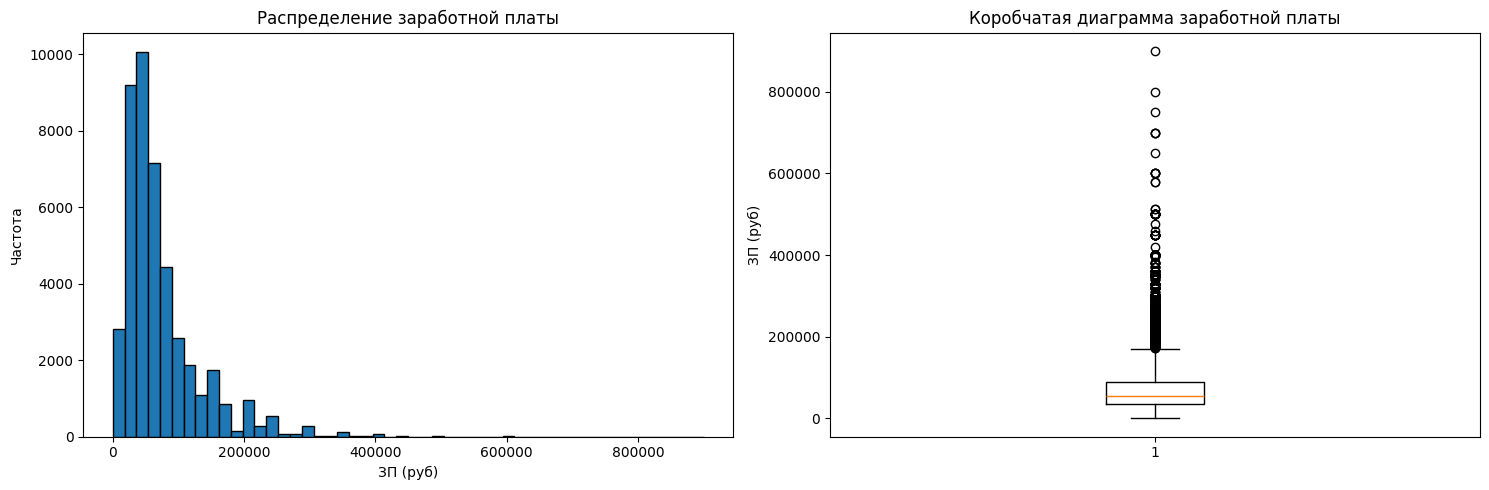

Минимум: 1.0
Максимум: 900000.0
Медиана: 55000.0


In [47]:
salary_col = None
for col in df.columns:
    if col.strip() == 'ЗП (руб)':
        salary_col = col
        break
    if col.strip() == 'ЗП':
        salary_col = col
        break

df['ЗП_num'] = pd.to_numeric(df[salary_col], errors='coerce')

high_salary_count = df[df['ЗП_num'] > 1_000_000].shape[0]
print(high_salary_count)

salary_to_plot = df['ЗП_num'].dropna()
salary_to_plot = salary_to_plot[salary_to_plot < 1_000_000]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(salary_to_plot, bins=50, edgecolor='black')
axes[0].set_title('Распределение заработной платы')
axes[0].set_xlabel('ЗП (руб)')
axes[0].set_ylabel('Частота')

axes[1].boxplot(salary_to_plot)
axes[1].set_title('Коробчатая диаграмма заработной платы')
axes[1].set_ylabel('ЗП (руб)')

plt.tight_layout()
plt.show()

print(f"Минимум: {salary_to_plot.min()}")
print(f"Максимум: {salary_to_plot.max()}")
print(f"Медиана: {salary_to_plot.median()}")

- Распределение желаемой заработной платы резко смещено влево (правостороннее распределение): основная масса соискателей указывает ЗП до 150 000-200 000 рублей.
- Минимальное значение зарплаты - 1 рубль, максимальное (с фильтром менее 1 млн) - 990 000 руб.
- Медианное значение - 55 000 руб.: половина соискателей хочет зарплату ниже этой суммы, половина - выше.
- На коробчатой диаграмме видно множество выбросов: есть респонденты, указывающие очень высокую зарплату по сравнению с большинством.
- Большинство значений находятся ниже 100 000 руб., выше наблюдается резкий спад количества резюме.
- Выбросы могут быть связаны с завышенными ожиданиями, ошибками ввода или специфической квалификацией соискателей.
- В целом распределение зарплат крайне неравномерно и содержит "длинный хвост" высоких значений.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

/var/folders/bh/sr1hhwmj4l38d3vk92t9492m0000gn/T/ipykernel_75530/2207399270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Уровень образования'] = df_filtered['Образование и ВУЗ'].apply(extract_education_level)


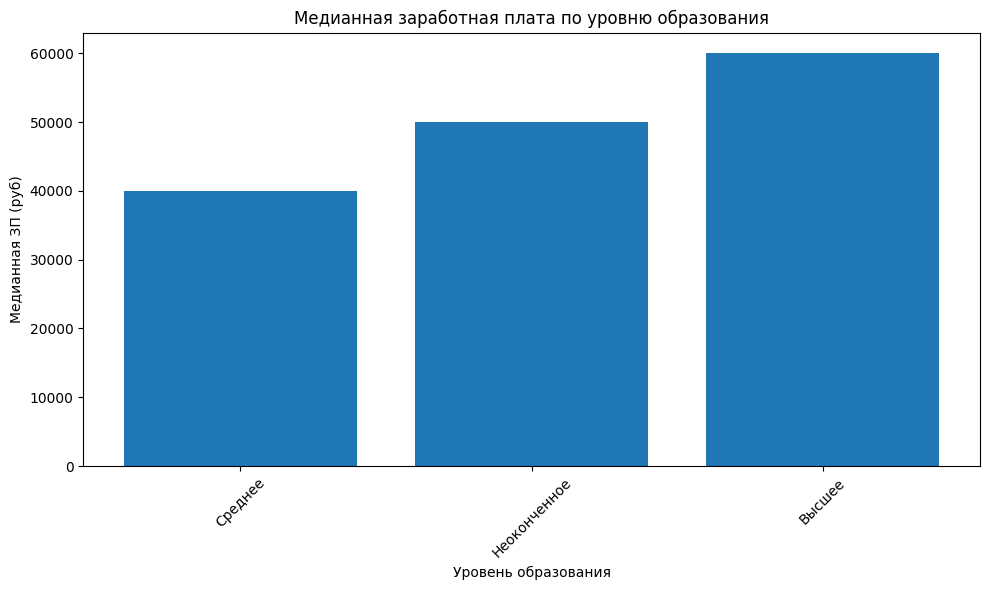

  Уровень образования   ЗП_num
2             Среднее  40000.0
1        Неоконченное  50000.0
0              Высшее  60000.0


In [48]:
df_filtered = df[df['ЗП_num'] < 1_000_000]

def extract_education_level(s):
    if pd.isna(s):
        return 'Не указано'
    return str(s).split(' ')[0]

df_filtered['Уровень образования'] = df_filtered['Образование и ВУЗ'].apply(extract_education_level)

education_salary = df_filtered.groupby('Уровень образования')['ЗП_num'].median().reset_index()
education_salary = education_salary.sort_values('ЗП_num')

plt.figure(figsize=(10, 6))
plt.bar(education_salary['Уровень образования'], education_salary['ЗП_num'])
plt.title('Медианная заработная плата по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(education_salary)

По графику видно, что медианная желаемая заработная плата растет с повышением уровня образования.
Соискатели с высшим образованием указывают самые высокие зарплатные ожидания (медиана - 60 000 руб.).
Для средне-специального и неполного высшего образования медианные значения ниже - 50 000 руб.
Наличие высшего образования связано с более высокими зарплатными ожиданиями.


5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

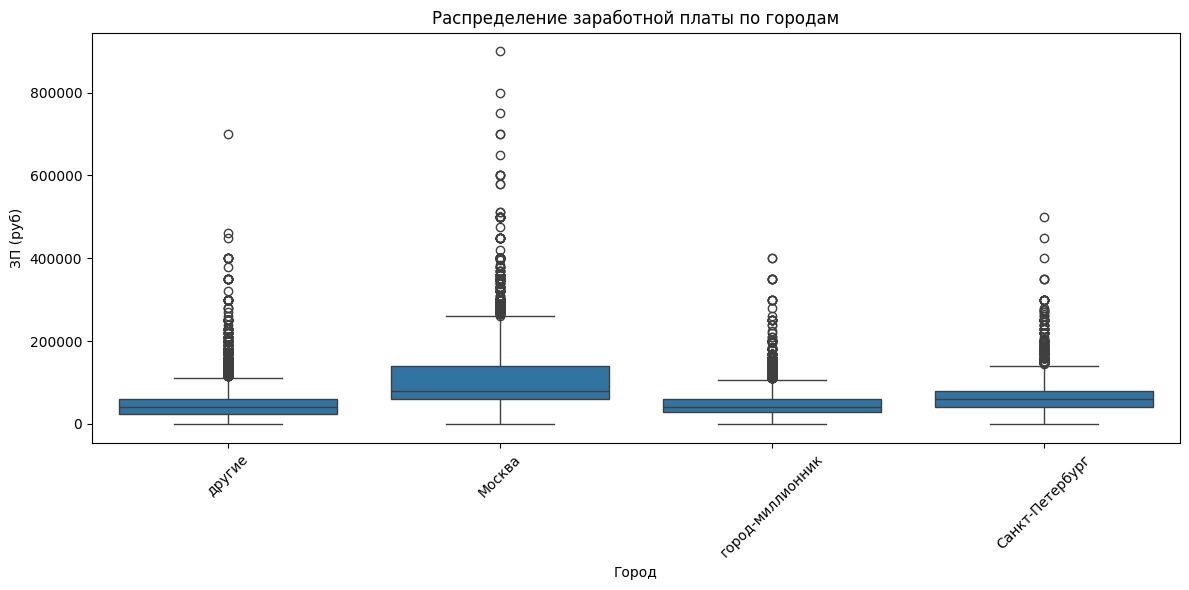

                   median       mean       std
Город                                         
Москва            80000.0  106485.97  71801.84
Санкт-Петербург   60000.0   70565.65  45000.50
город-миллионник  40000.0   50325.67  33593.35
другие            40000.0   48175.51  39302.03


In [49]:
df_filtered = df[df['ЗП_num'] < 1000000]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Город', y='ЗП (руб)')
plt.title('Распределение заработной платы по городам')
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

city_salary = df_filtered.groupby('Город')['ЗП (руб)'].agg(['median', 'mean', 'std']).round(2)
print(city_salary)

По диаграмме видно, что медианная желаемая заработная плата в Москве и Санкт-Петербурге выше, чем в городах-миллионниках и прочих городах. 
В Москве медианная зарплата составляет 80 000 руб., в Санкт-Петербурге - 70 000 руб., в городах-миллионниках и остальных городах медианные значения ниже - 60 000 и 40 000 руб. соответственно.
Также заметно, что разброс зарплат в Москве и Санкт-Петербурге значительно выше, чем в других городах: это подтверждается и стандартным отклонением.
Следовательно, признак города является важным фактором для прогнозирования заработной платы: уровень зарплат и их вариация существенно зависят от региона.


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

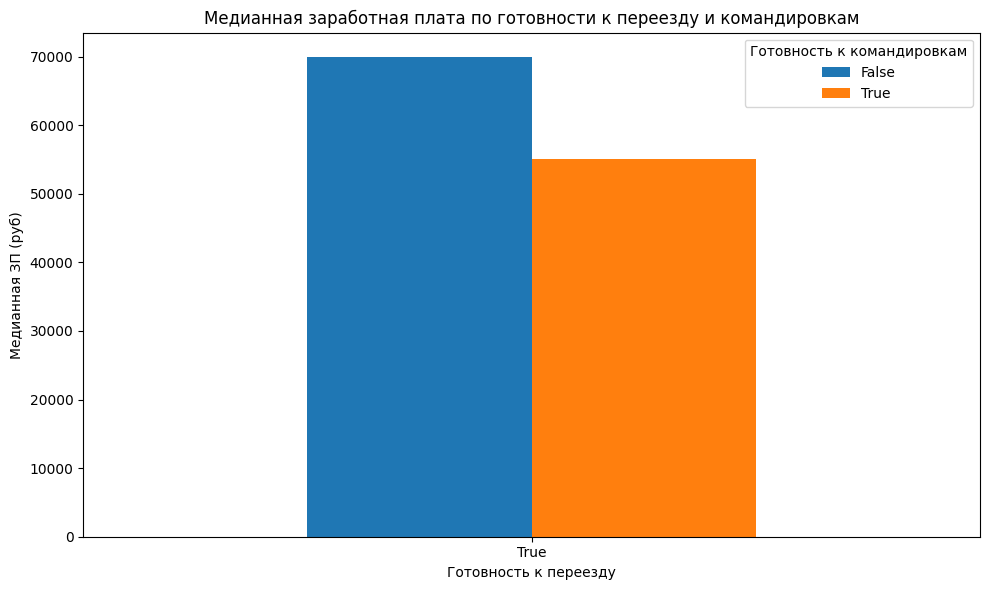

Готовность к командировкам    False    True 
Готовность к переезду                       
True                        70000.0  55000.0


In [50]:
df_filtered = df[df['ЗП_num'] < 1000000]

pivot_table = df_filtered.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП_num'].median().reset_index()
pivot_table_pivot = pivot_table.pivot(index='Готовность к переезду', columns='Готовность к командировкам', values='ЗП_num')

pivot_table_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Медианная заработная плата по готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.legend(title='Готовность к командировкам')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(pivot_table_pivot)

По многоуровневой столбчатой диаграмме видно, что медианная заработная плата значительно зависит от готовности кандидата к командировкам. Среди соискателей, готовых к переезду, те, кто не готов ездить в командировки, имеют более высокую медианную зарплату (70 000 руб.), чем те, кто готов к командировкам (55 000 руб.). Это может указывать на то, что рынок труда оценивает готовность к командировкам и переезду по-разному, и высокий доход чаще встречается среди тех, кто не готов к частым разъездам, даже если открыт к переезду. Возможно, работодатели по-разному ценят эти качества в зависимости от должности


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

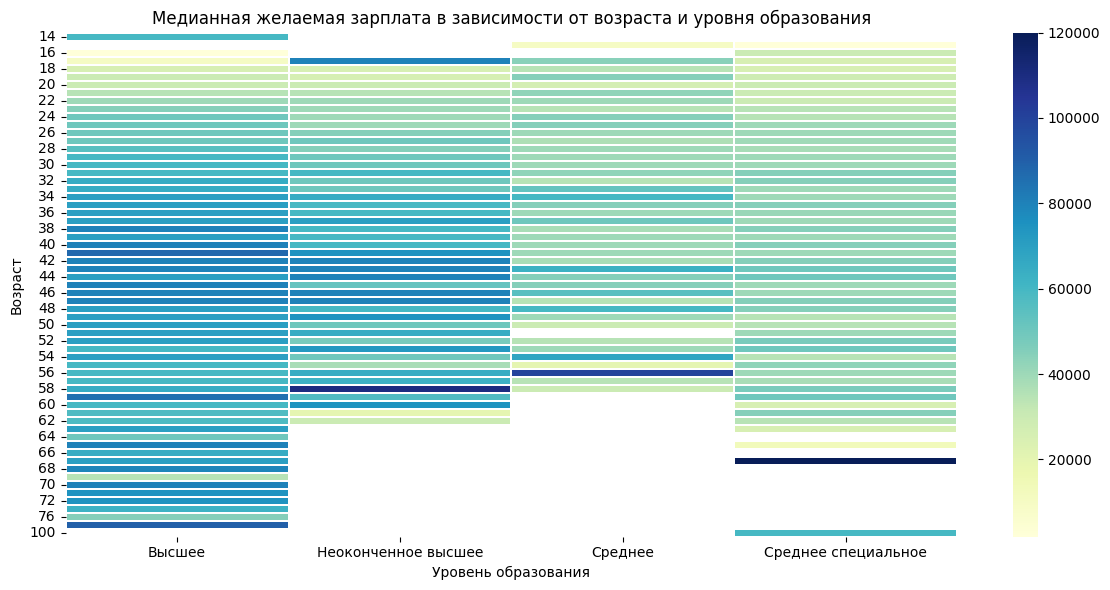

Уровень образования   Высшее  Неоконченное высшее  Среднее  \
Возраст                                                      
14                   60000.0                  NaN      NaN   
15                       NaN                  NaN  10000.0   
16                    1900.0                  NaN      NaN   
17                   10000.0              80000.0  44000.0   
18                   25000.0              25000.0  35000.0   
...                      ...                  ...      ...   
72                   75000.0                  NaN      NaN   
73                   62500.0                  NaN      NaN   
76                   45000.0                  NaN      NaN   
77                   90000.0                  NaN      NaN   
100                      NaN                  NaN      NaN   

Уровень образования  Среднее специальное  
Возраст                                   
14                                   NaN  
15                                2000.0  
16                   

In [51]:
def extract_education_level(edu_str):
    if pd.isna(edu_str):
        return 'Не указано'
    if 'Высшее' in edu_str:
        return 'Высшее'
    if 'Среднее специальное' in edu_str or 'Среднее спец.' in edu_str:
        return 'Среднее специальное'
    if 'Среднее' in edu_str:
        return 'Среднее'
    if 'Неоконченное высшее' in edu_str:
        return 'Неоконченное высшее'
    return 'Другое'

df_filtered = df[df['ЗП (руб)'] < 1_000_000].copy()

df_filtered['Возраст'] = pd.to_numeric(df_filtered['Возраст'], errors='coerce')
df_filtered['Уровень образования'] = df_filtered['Образование и ВУЗ'].apply(extract_education_level)

pivot_salary = df_filtered.pivot_table(
    index='Возраст', 
    columns='Уровень образования', 
    values='ЗП (руб)', 
    aggfunc='median'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_salary, cmap="YlGnBu", linewidths=0.3)
plt.title('Медианная желаемая зарплата в зависимости от возраста и уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Возраст')
plt.tight_layout()
plt.show()

print(pivot_salary)


Согласно тепловой карте, медианная желаемая заработная плата соискателей, как правило, увеличивается с возрастом практически во всех группах по уровню образования. Наиболее высокие медианные зарплаты наблюдаются у соискателей с высшим образованием, особенно в возрасте от 30 до 60 лет. Для молодых соискателей (до 25 лет) уровень образования имеет меньшее влияние на зарплатные ожидания, в то время как к 30-40 годам различия становятся более выраженными.
В группе с неоконченным высшим и средним образованием медианные зарплаты заметно ниже, чем у обладателей высшего образования. У категории "Среднее специальное" также наблюдаются относительно низкие медианные значения, но они все равно обычно выше, чем у "Среднего". 
Можно также заметить, что с возрастом (особенно после 55-60 лет) желаемый уровень зарплаты, независимо от образования, либо стабилизируется, либо начинает снижаться. Это может быть связано с выходом на пенсию, изменением должности или другими социально-экономическими факторами.
Таким образом, тепловая карта наглядно показывает четкую зависимость между уровнем образования, возрастом и ожидаемым доходом: наибольший потенциал для высоких зарплат имеют наиболее образованные и опытные соискатели среднего возраста.


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

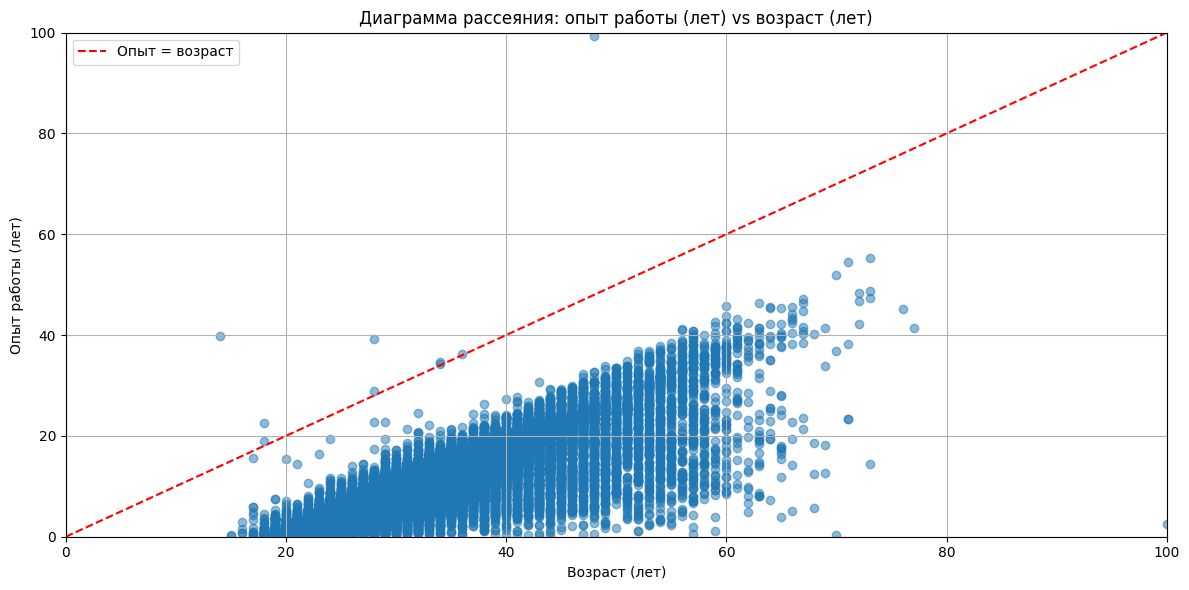

In [52]:
plt.figure(figsize=(12, 6))
experience_years = df_filtered['Опыт работы (месяц)'] / 12
age = df_filtered['Возраст']

plt.scatter(age, experience_years, alpha=0.5)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = возраст')

plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (лет)')
plt.title('Диаграмма рассеяния: опыт работы (лет) vs возраст (лет)')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


На диаграмме рассеяния видно, что большинство точек (соискателей) располагаются ниже красной пунктирной линии, означающей равенство опыта работы и возраста, что соответствует нормальной ситуации. Точки, лежащие на линии или выше неё, являются аномалиями: например, если опыт равен или превышает возраст, это практически невозможно и, вероятно, говорит об ошибках в данных или о некорректно заполненных резюме. В целом, наблюдается очевидная положительная зависимость между возрастом и опытом работы: с увеличением возраста растёт и накопленный опыт, однако разброс возрастает, что может указывать на различия карьерных траекторий у разных людей.


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


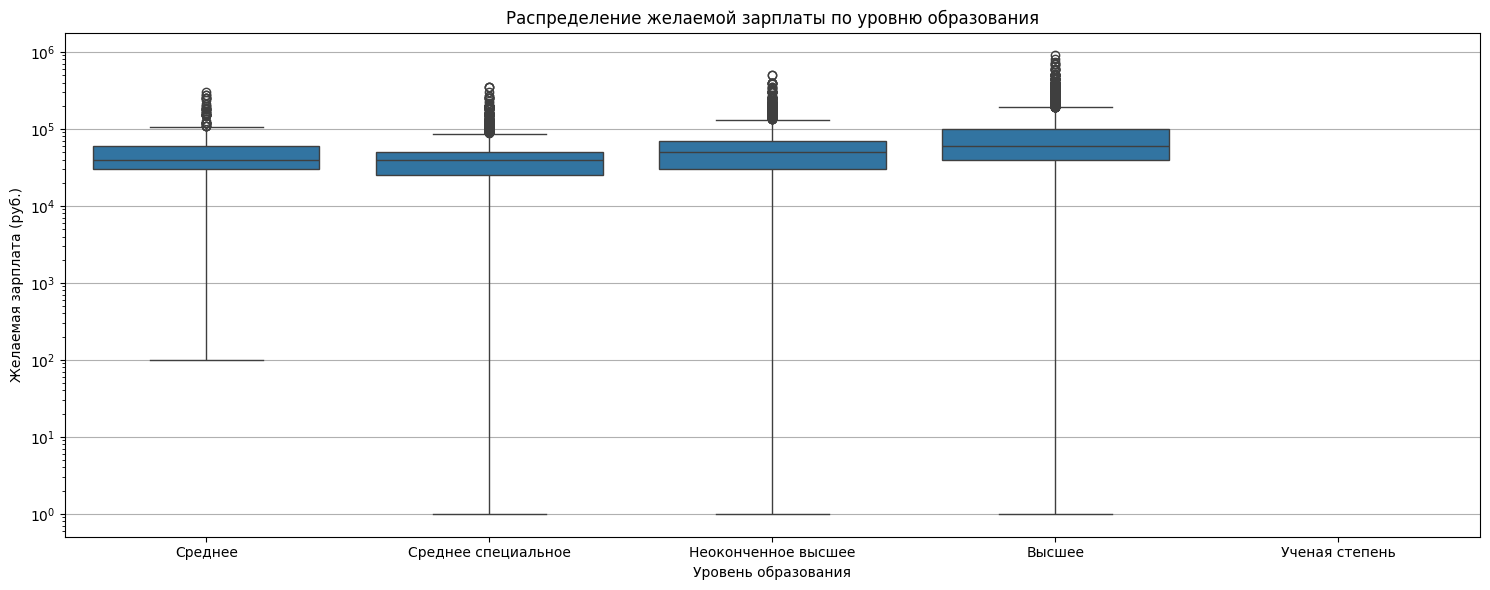

/var/folders/bh/sr1hhwmj4l38d3vk92t9492m0000gn/T/ipykernel_75530/1563665157.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age = df_filtered.groupby(['age_group', 'Пол_испр']).size().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

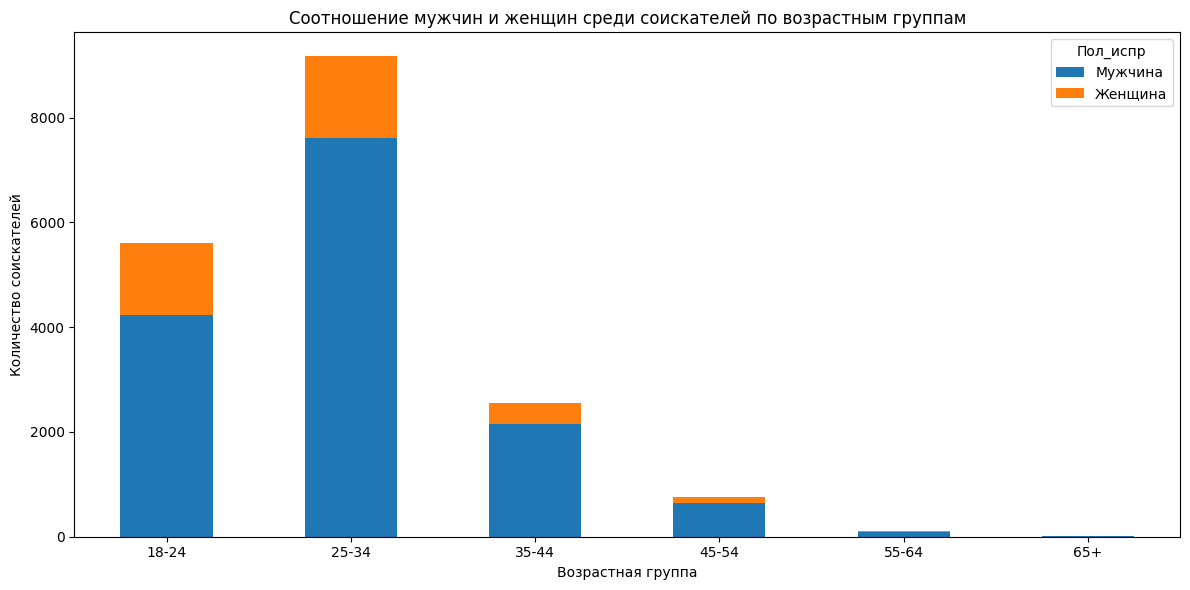

In [ ]:
plt.figure(figsize=(15, 6))
order = ['Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Ученая степень']
sns.boxplot(
    data=df_filtered,
    x='Уровень образования',
    y='ЗП_num',
    order=order
)
plt.xlabel('Уровень образования')
plt.ylabel('Желаемая зарплата (руб.)')
plt.title('Распределение желаемой зарплаты по уровню образования')
plt.yscale('log')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

import re

def extract_gender(s):
    if pd.isnull(s):
        return None
    if 'Женщина' in s:
        return 'Женщина'
    elif 'Мужчина' in s:
        return 'Мужчина'
    else:
        return None

def extract_age(s):
    if pd.isnull(s):
        return None
    match = re.search(r'(\d+)\s+год', s)
    if match:
        return int(match.group(1))
    else:
        return None

df_filtered['Пол_испр'] = df_filtered['Пол, возраст'].apply(extract_gender)
df_filtered['Возраст_испр'] = df_filtered['Пол, возраст'].apply(extract_age)

plt.figure(figsize=(12,6))
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_filtered['age_group'] = pd.cut(df_filtered['Возраст_испр'], bins=age_bins, right=False, labels=age_labels)
gender_age = df_filtered.groupby(['age_group', 'Пол_испр']).size().unstack().fillna(0)

columns = []
if 'Мужчина' in gender_age.columns:
    columns.append('Мужчина')
if 'Женщина' in gender_age.columns:
    columns.append('Женщина')

gender_age[columns].plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Возрастная группа')
plt.ylabel('Количество соискателей')
plt.title('Соотношение мужчин и женщин среди соискателей по возрастным группам')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [54]:
duplicates_count = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count}")
df = df.drop_duplicates()
print(f"Размер после удаления: {df.shape}")

Количество дубликатов: 158
Размер после удаления: (44586, 24)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [55]:
missing = df.isnull().sum()
print(missing[missing > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
ЗП (руб)                           329
ЗП_num                             329
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [56]:
initial_size = len(df)
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
removed_rows = initial_size - len(df)
print(f"Удалено строк с пропусками в месте работы/должности: {removed_rows}")

median_experience = df['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы: {median_experience:.2f} месяцев")
filled_count = df['Опыт работы (месяц)'].isna().sum()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)
print(f"Заполнено пропусков в опыте работы: {filled_count}")
print(f"Текущий размер датасета: {df.shape}")

Удалено строк с пропусками в месте работы/должности: 2
Медианный опыт работы: 100.00 месяцев
Заполнено пропусков в опыте работы: 168
Текущий размер датасета: (44584, 24)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [57]:
initial_size = len(df)
df = df[(df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1000000)]
removed_rows = initial_size - len(df)
print(f"Удалено строк с выбросами по ЗП: {removed_rows}")
print(f"Текущий размер датасета: {df.shape}")

Удалено строк с выбросами по ЗП: 709
Текущий размер датасета: (43875, 24)


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [58]:
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12
anomalies = df[df['Опыт работы (год)'] >= df['Возраст']]
print(f"Количество аномалий: {len(anomalies)}")
df = df[df['Опыт работы (год)'] < df['Возраст']]
df = df.drop('Опыт работы (год)', axis=1)

Количество аномалий: 24


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

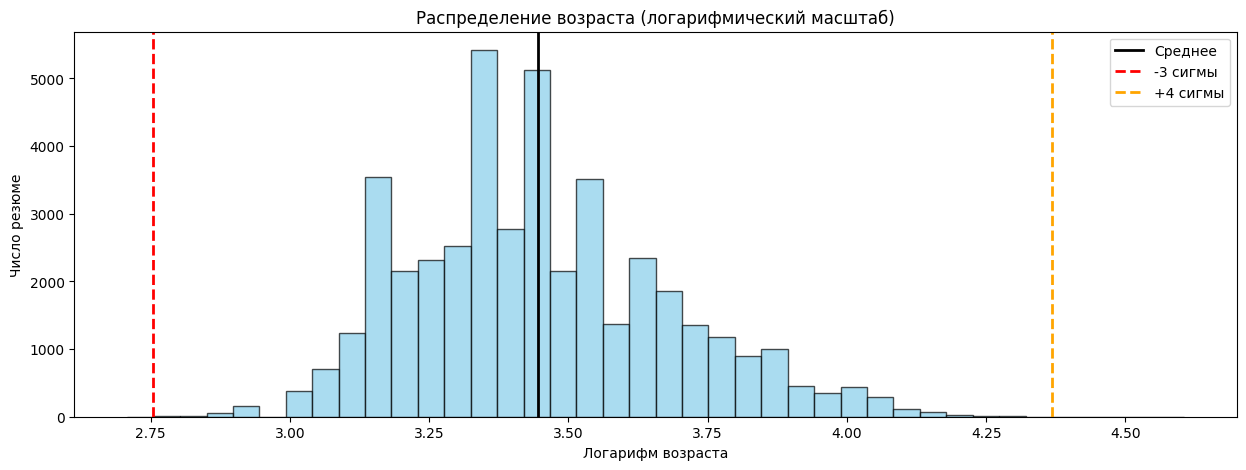

Количество выбросов: 1


,Возраст
33654,100


In [59]:
import numpy as np
import matplotlib.pyplot as plt

log_age = np.log(df['Возраст'])

mu = log_age.mean()
sigma = log_age.std()

fig, ax = plt.subplots(figsize=(15, 5))
histplot = plt.hist(log_age, bins=40, alpha=0.7, color='skyblue', edgecolor='black')
ax = plt.gca()
ax.axvline(mu, color='k', lw=2, label='Среднее')
ax.axvline(mu - 3*sigma, color='red', lw=2, linestyle='--', label='-3 сигмы')
ax.axvline(mu + 4*sigma, color='orange', lw=2, linestyle='--', label='+4 сигмы')

plt.xlabel('Логарифм возраста')
plt.ylabel('Число резюме')
plt.title('Распределение возраста (логарифмический масштаб)')
plt.legend()
plt.show()

z_scores = (log_age - mu) / sigma
outliers = df[z_scores > 4]

print(f"Количество выбросов: {len(outliers)}")
display(outliers[['Возраст']])

df = df[z_scores <= 4].copy()


Распределение логарифма возраста асимметрично в правую сторону (имеет правосторонний "хвост"), что указывает на наличие кандидатов c необычно большим возрастом. Это видно по вытянутому "хвосту" гистограммы справа. Большинство соискателей сосредоточено вокруг среднего значения, а выбросы находятся далеко вправо за границей +4 сигм. После удаления выбросов (правее +4 сигм) из данных, к ним попали претенденты в возрасте около 100 лет и старше, что маловероятно для реальных соискателей. Таким образом, мы очистили выборку от аномально высоких значений возраста.
